In [755]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import glob

In [756]:
Files = os.listdir(r'C:\Users\User\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')


In [757]:
Files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [758]:
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join(r'C:\Users\User\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data', 'Sales*.csv'))), ignore_index= True)


In [759]:
df.to_csv("mergeddata.csv", index=False)

In [760]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [761]:
df.dropna(inplace=True,how='all') #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [762]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [763]:
df.shape

(186305, 6)

In [764]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [765]:
df1 = df[df['Quantity Ordered'].str[:] != 'Quantity Ordered']

In [766]:
df1['Order ID']=df1['Order ID'].astype('int64')
df1['Quantity Ordered']=df1['Quantity Ordered'].astype('int64')
df1['Price Each']=df1['Price Each'].astype('float').astype('int64')
df1['Order Date']=pd.to_datetime(df1['Order Date'])

C:\Users\User\AppData\Local\Temp/ipykernel_8368/3690905119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Order ID']=df1['Order ID'].astype('int64')
C:\Users\User\AppData\Local\Temp/ipykernel_8368/3690905119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Quantity Ordered']=df1['Quantity Ordered'].astype('int64')
C:\Users\User\AppData\Local\Temp/ipykernel_8368/3690905119.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [767]:
df1.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                   int64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [768]:
df2=df1.groupby(['Product'])['Quantity Ordered'].sum().sort_values(ascending=False)[:10]

<AxesSubplot:title={'center':'Top 10 product sales'}, xlabel='Product'>

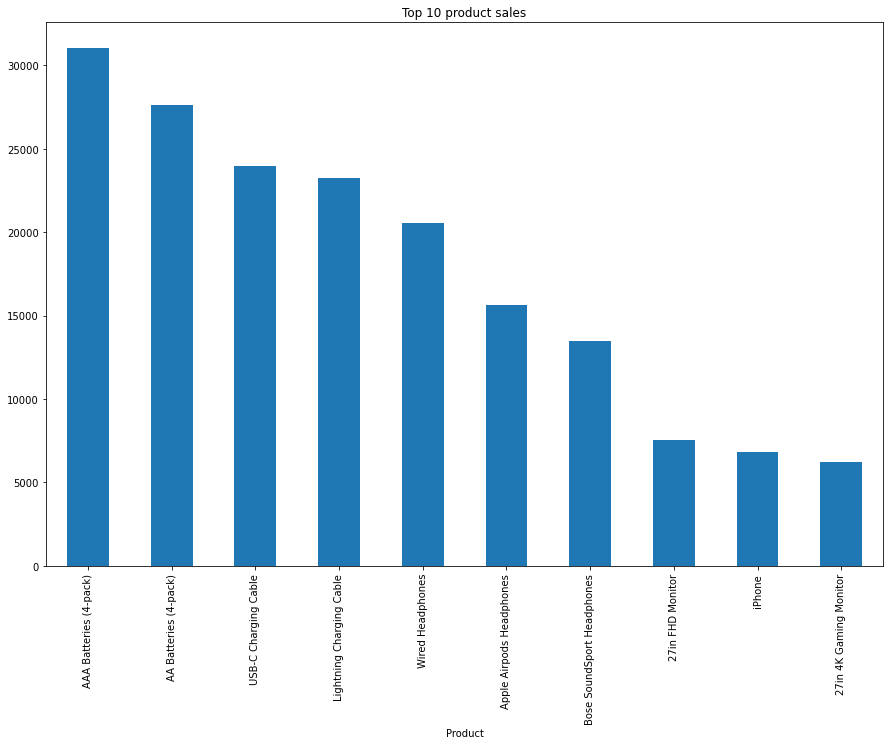

In [769]:
df2.plot(kind='bar',title='Top 10 product sales',figsize=(15,10))

In [770]:
df1['Sales']=df1['Quantity Ordered']*df1['Price Each']# Created a column sales


C:\Users\User\AppData\Local\Temp/ipykernel_8368/2468268026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sales']=df1['Quantity Ordered']*df1['Price Each']# Created a column sales


In [771]:
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",22
2,176559,Bose SoundSport Headphones,1,99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600
4,176560,Wired Headphones,1,11,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11
5,176561,Wired Headphones,1,11,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",6
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700
186848,259356,34in Ultrawide Monitor,1,379,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379


what is the City with more sales

In [772]:
df1['city']=df1['Purchase Address'].apply(lambda x: x.split(',')[1] + ' (' + x.split(',')[2].split(' ')[1]+') ')

C:\Users\User\AppData\Local\Temp/ipykernel_8368/1653971248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['city']=df1['Purchase Address'].apply(lambda x: x.split(',')[1] + ' (' + x.split(',')[2].split(' ')[1]+') ')


In [773]:
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,city
0,176558,USB-C Charging Cable,2,11,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",22,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99,Boston (MA)
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600,Los Angeles (CA)
4,176560,Wired Headphones,1,11,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11,Los Angeles (CA)
5,176561,Wired Headphones,1,11,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11,Los Angeles (CA)
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",6,Los Angeles (CA)
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700,San Francisco (CA)
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379,San Francisco (CA)


In [774]:
df2=df1.groupby(['city'])['Sales'].sum().sort_values(ascending=False)[:12]

In [775]:
df2=df2.reset_index()

<AxesSubplot:title={'center':'sales wrt to cities'}, xlabel='city'>

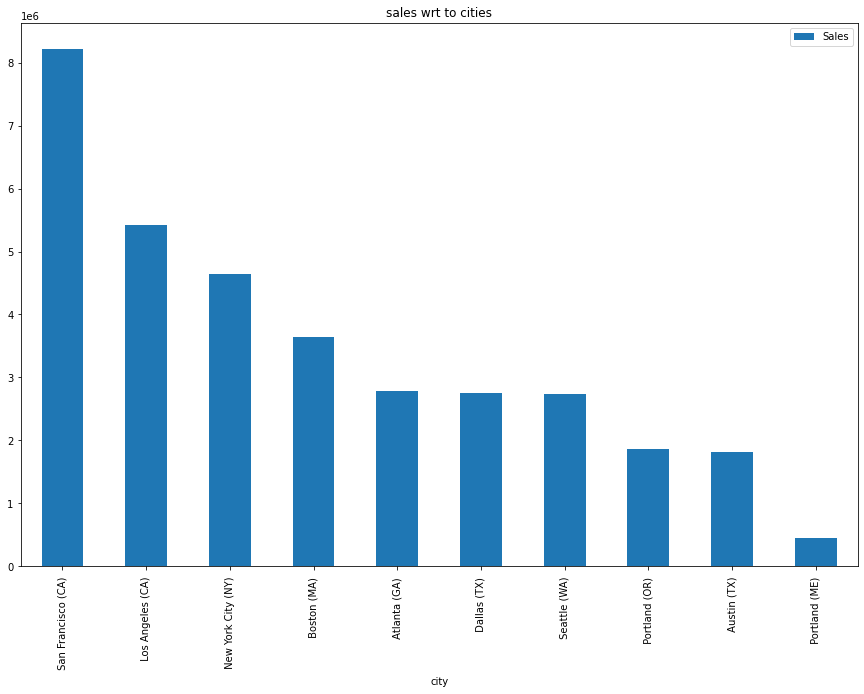

In [776]:
df2.plot(kind='bar',title='sales wrt to cities',figsize=(15,10),x='city')

In [777]:
import matplotlib.pyplot as plt
from matplotlib import figure

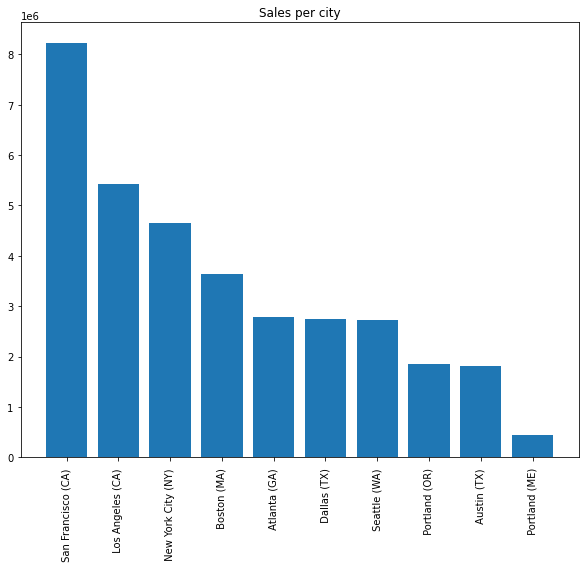

In [778]:
plt.bar(df2.city, df2.Sales)
plt.xticks(df2.city ,rotation='vertical',size=10)
plt.rcParams["figure.figsize"] = (10,8)
plt.title('Sales per city')
plt.show()

Lets check for the time where we have received more orders ?

In [779]:
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,city
0,176558,USB-C Charging Cable,2,11,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",22,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99,Boston (MA)
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600,Los Angeles (CA)
4,176560,Wired Headphones,1,11,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11,Los Angeles (CA)
5,176561,Wired Headphones,1,11,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11,Los Angeles (CA)
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",6,Los Angeles (CA)
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700,San Francisco (CA)
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379,San Francisco (CA)


In [780]:
df1['Hour']=df1['Order Date'].dt.hour

C:\Users\User\AppData\Local\Temp/ipykernel_8368/1595967245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Hour']=df1['Order Date'].dt.hour


In [781]:
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,city,Hour
0,176558,USB-C Charging Cable,2,11,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",22,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99,Boston (MA),22
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600,Los Angeles (CA),14
4,176560,Wired Headphones,1,11,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11,Los Angeles (CA),14
5,176561,Wired Headphones,1,11,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11,Los Angeles (CA),9
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",6,Los Angeles (CA),20
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700,San Francisco (CA),16
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700,San Francisco (CA),7
186848,259356,34in Ultrawide Monitor,1,379,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379,San Francisco (CA),17


In [782]:
df1.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Sales', 'city', 'Hour'],
      dtype='object')

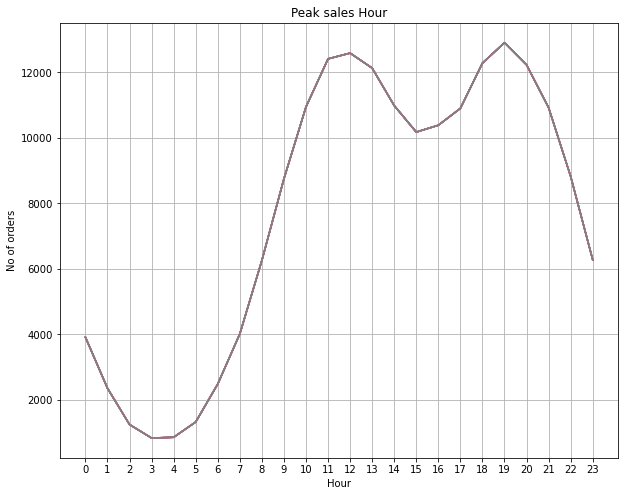

In [783]:
Hours=[Hour for Hour, df in df1.groupby('Hour')]
plt.plot(Hours, df1.groupby(['Hour']).count())
plt.xticks(Hours)
plt.title('Peak sales Hour')
plt.xlabel('Hour')
plt.ylabel('No of orders')

plt.grid()

Insights_ We found that peak hours are from 11 to 12 in the noon and in btw 19 to 20 hours in the evening. Might be the best time to put on some advertisements which can boost sales.

Hourly orders for different cities

In [784]:
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,city,Hour
0,176558,USB-C Charging Cable,2,11,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",22,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99,Boston (MA),22
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600,Los Angeles (CA),14
4,176560,Wired Headphones,1,11,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11,Los Angeles (CA),14
5,176561,Wired Headphones,1,11,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11,Los Angeles (CA),9
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",6,Los Angeles (CA),20
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700,San Francisco (CA),16
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700,San Francisco (CA),7
186848,259356,34in Ultrawide Monitor,1,379,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379,San Francisco (CA),17


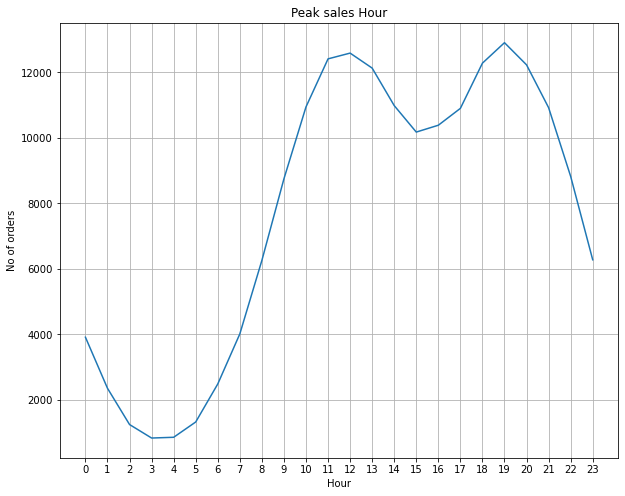

In [785]:
Hours=[Hour for Hour, df in df1.groupby('Hour')]
plt.plot(Hours, df1.groupby(['Hour'])['city'].count())
plt.xticks(Hours)
plt.title('Peak sales Hour')
plt.xlabel('Hour')
plt.ylabel('No of orders')

plt.grid()

In [786]:
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,city,Hour
0,176558,USB-C Charging Cable,2,11,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",22,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99,Boston (MA),22
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600,Los Angeles (CA),14
4,176560,Wired Headphones,1,11,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11,Los Angeles (CA),14
5,176561,Wired Headphones,1,11,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11,Los Angeles (CA),9
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",6,Los Angeles (CA),20
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700,San Francisco (CA),16
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700,San Francisco (CA),7
186848,259356,34in Ultrawide Monitor,1,379,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379,San Francisco (CA),17


In [787]:
Hourly_sales_city=df1.groupby(['Hour','city'])['Sales'].count().sort_values(ascending=False)


In [788]:
Hourly_sales_city.reset_index()

,Hour,city,Sales
0,19,San Francisco (CA),3106
1,12,San Francisco (CA),2998
2,18,San Francisco (CA),2988
3,11,San Francisco (CA),2964
4,20,San Francisco (CA),2945
...,...,...,...
235,1,Portland (ME),34
236,5,Portland (ME),14
237,2,Portland (ME),14
238,3,Portland (ME),11


In [789]:
df3=df1.groupby(['city','Hour'])['Sales'].count().reset_index()

In [790]:
df3['city'].unique()

array([' Atlanta (GA) ', ' Austin (TX) ', ' Boston (MA) ',
       ' Dallas (TX) ', ' Los Angeles (CA) ', ' New York City (NY) ',
       ' Portland (ME) ', ' Portland (OR) ', ' San Francisco (CA) ',
       ' Seattle (WA) '], dtype=object)

In [791]:
Hourly_sales_city =Hourly_sales_city.reset_index()

In [792]:
Master = pd.DataFrame()

In [793]:
for city in Hourly_sales_city['city'].unique():
    Hourly_sales_city_temp = Hourly_sales_city[Hourly_sales_city['city'] ==city]
    Hourly_sales_city_temp = Hourly_sales_city_temp.sort_values(by="Sales",ascending=False)
    Master = Master.append(Hourly_sales_city_temp.iloc[0])

In [794]:
Master

,Hour,city,Sales
0,19.0,San Francisco (CA),3106.0
14,11.0,Los Angeles (CA),2025.0
21,19.0,New York City (NY),1753.0
40,19.0,Boston (MA),1401.0
56,19.0,Atlanta (GA),1047.0
58,13.0,Dallas (TX),1013.0
59,12.0,Seattle (WA),1012.0
102,12.0,Portland (OR),733.0
110,19.0,Austin (TX),685.0
181,11.0,Portland (ME),177.0


In [795]:
df4=df3.sort_values(by='Sales', ascending=False).drop_duplicates(['city'])

In [796]:
df4

,city,Hour,Sales
211,San Francisco (CA),19,3106
107,Los Angeles (CA),11,2025
139,New York City (NY),19,1753
67,Boston (MA),19,1401
19,Atlanta (GA),19,1047
85,Dallas (TX),13,1013
228,Seattle (WA),12,1012
180,Portland (OR),12,733
43,Austin (TX),19,685
155,Portland (ME),11,177


Peak hours for the respective cities. Might be a good thing to show ads wrt to timings in these states. 

In [797]:
df3

,city,Hour,Sales
0,Atlanta (GA),0,310
1,Atlanta (GA),1,213
2,Atlanta (GA),2,113
3,Atlanta (GA),3,57
4,Atlanta (GA),4,80
...,...,...,...
235,Seattle (WA),19,989
236,Seattle (WA),20,988
237,Seattle (WA),21,869
238,Seattle (WA),22,693


In [798]:
df1.drop(['Purchase Address'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [799]:
df1['Order ID']

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 185950, dtype: int64

In [800]:
Duplicated = df1['Order ID'].duplicated()

In [801]:
Duplicated

0         False
2         False
3         False
4          True
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Name: Order ID, Length: 185950, dtype: bool

In [802]:
duplicate_in_order = df1.duplicated(subset=['Order ID'])


In [803]:
df1.loc[duplicate_in_order]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,city,Hour
4,176560,Wired Headphones,1,11,2019-04-12 14:38:00,11,Los Angeles (CA),14
19,176574,USB-C Charging Cable,1,11,2019-04-03 19:42:00,11,Los Angeles (CA),19
31,176585,Bose SoundSport Headphones,1,99,2019-04-07 11:31:00,99,Boston (MA),11
33,176586,Google Phone,1,600,2019-04-10 17:00:00,600,San Francisco (CA),17
120,176672,USB-C Charging Cable,1,11,2019-04-12 11:07:00,11,New York City (NY),11
...,...,...,...,...,...,...,...,...
186784,259297,Lightning Charging Cable,1,14,2019-09-15 18:54:00,14,Boston (MA),18
186785,259297,Lightning Charging Cable,1,14,2019-09-15 18:54:00,14,Boston (MA),18
186792,259303,AA Batteries (4-pack),1,3,2019-09-20 20:18:00,3,Atlanta (GA),20
186804,259314,AAA Batteries (4-pack),2,2,2019-09-16 00:25:00,4,Atlanta (GA),0


In [804]:
pd.Series(df1['Order ID']).is_unique


False

In [805]:
#Checking which products are frequently brought together

In [806]:
df1#['Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,city,Hour
0,176558,USB-C Charging Cable,2,11,2019-04-19 08:46:00,22,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99,2019-04-07 22:30:00,99,Boston (MA),22
3,176560,Google Phone,1,600,2019-04-12 14:38:00,600,Los Angeles (CA),14
4,176560,Wired Headphones,1,11,2019-04-12 14:38:00,11,Los Angeles (CA),14
5,176561,Wired Headphones,1,11,2019-04-30 09:27:00,11,Los Angeles (CA),9
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2,2019-09-17 20:56:00,6,Los Angeles (CA),20
186846,259354,iPhone,1,700,2019-09-01 16:00:00,700,San Francisco (CA),16
186847,259355,iPhone,1,700,2019-09-23 07:39:00,700,San Francisco (CA),7
186848,259356,34in Ultrawide Monitor,1,379,2019-09-19 17:30:00,379,San Francisco (CA),17


In [807]:
df1=df1[df1.duplicated(['Order ID'], keep=False)]
df1['Grouped']= df1.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x))
df1= df1[['Order ID','Grouped']].drop_duplicates()

C:\Users\User\AppData\Local\Temp/ipykernel_8368/2751466407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped']= df1.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x))


In [808]:
df1.head(5)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [809]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
count.most_common(5)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361)]

# Checking the count of the most freqeuntly brought products : method 2

In [810]:
df10=df[df.duplicated(['Order ID'], keep=False)]

In [811]:
df10

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
18,176574,Google Phone,1,600,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301"
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301"
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301"
186841,259350,Google Phone,1,600,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016"


In [812]:
df10=df10.groupby(['Order ID'])['Product'].unique()

In [813]:
df10=df10.reset_index()

In [814]:
df10

,Order ID,Product
0,141275,"[USB-C Charging Cable, Wired Headphones]"
1,141290,"[Apple Airpods Headphones, AA Batteries (4-pack)]"
2,141365,"[Vareebadd Phone, Wired Headphones]"
3,141384,"[Google Phone, USB-C Charging Cable]"
4,141450,"[Google Phone, Bose SoundSport Headphones]"
...,...,...
7132,319556,"[Google Phone, Wired Headphones]"
7133,319584,"[iPhone, Wired Headphones]"
7134,319596,"[iPhone, Lightning Charging Cable]"
7135,319631,"[34in Ultrawide Monitor, Lightning Charging Ca..."


In [815]:
df10['Product_new']=df10['Product'].apply(lambda x: ','.join([str(elem) for elem in x]))

In [816]:
df10

,Order ID,Product,Product_new
0,141275,"[USB-C Charging Cable, Wired Headphones]","USB-C Charging Cable,Wired Headphones"
1,141290,"[Apple Airpods Headphones, AA Batteries (4-pack)]","Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"[Vareebadd Phone, Wired Headphones]","Vareebadd Phone,Wired Headphones"
3,141384,"[Google Phone, USB-C Charging Cable]","Google Phone,USB-C Charging Cable"
4,141450,"[Google Phone, Bose SoundSport Headphones]","Google Phone,Bose SoundSport Headphones"
...,...,...,...
7132,319556,"[Google Phone, Wired Headphones]","Google Phone,Wired Headphones"
7133,319584,"[iPhone, Wired Headphones]","iPhone,Wired Headphones"
7134,319596,"[iPhone, Lightning Charging Cable]","iPhone,Lightning Charging Cable"
7135,319631,"[34in Ultrawide Monitor, Lightning Charging Ca...","34in Ultrawide Monitor,Lightning Charging Cable"


In [817]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df10['Product_new']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
#print(count)
count.most_common(5)

[(('iPhone', 'Lightning Charging Cable'), 1002),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361)]

# Check for the product sold the most.

In [818]:
df['Quantity Ordered']

0         2
2         1
3         1
4         1
5         1
         ..
186845    3
186846    1
186847    1
186848    1
186849    1
Name: Quantity Ordered, Length: 186305, dtype: object

In [819]:

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [820]:
df13 = df[df['Quantity Ordered'].str[:] != 'Quantity Ordered']
df13['Quantity Ordered']=df13['Quantity Ordered'].astype('int64')


C:\Users\User\AppData\Local\Temp/ipykernel_8368/2949833642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['Quantity Ordered']=df13['Quantity Ordered'].astype('int64')


In [821]:
df13.dtypes

Order ID            object
Product             object
Quantity Ordered     int64
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [822]:
df14=df13.groupby(['Product'])['Quantity Ordered'].sum().sort_values(ascending=False)[:10]

In [823]:
df14=df14.reset_index()

In [824]:
df14

,Product,Quantity Ordered
0,AAA Batteries (4-pack),31017
1,AA Batteries (4-pack),27635
2,USB-C Charging Cable,23975
3,Lightning Charging Cable,23217
4,Wired Headphones,20557
5,Apple Airpods Headphones,15661
6,Bose SoundSport Headphones,13457
7,27in FHD Monitor,7550
8,iPhone,6849
9,27in 4K Gaming Monitor,6244


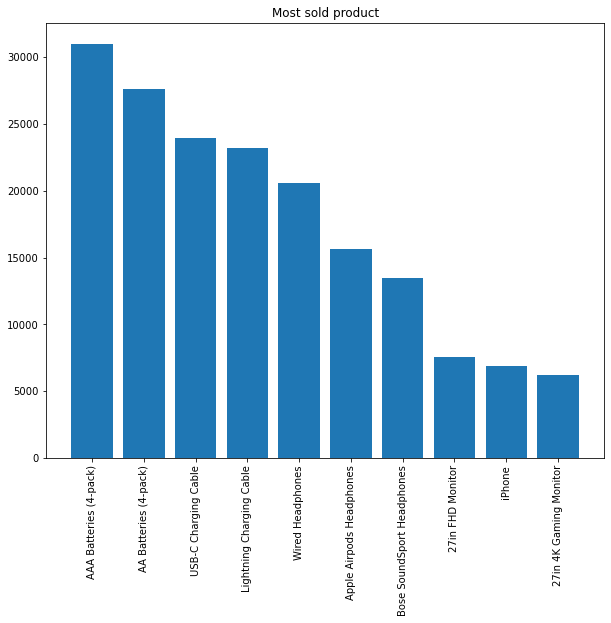

In [825]:
#df14.plot(kind='bar',title='MostSoldproduct',)
plt.bar(df14.Product, df14['Quantity Ordered'])
plt.xticks(df14.Product ,rotation='vertical',size=10)
plt.rcParams["figure.figsize"] = (10,8)
plt.title('Most sold product')
plt.show()

In [826]:
df13.dtypes

Order ID            object
Product             object
Quantity Ordered     int64
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [827]:
df13['Price Each']=df13['Price Each'].astype('float').astype('int64')


C:\Users\User\AppData\Local\Temp/ipykernel_8368/1689070780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['Price Each']=df13['Price Each'].astype('float').astype('int64')


In [828]:
df13.groupby('Product')['Price Each'].mean().sort_values(ascending=True)

Product
AAA Batteries (4-pack)           2.0
AA Batteries (4-pack)            3.0
Wired Headphones                11.0
USB-C Charging Cable            11.0
Lightning Charging Cable        14.0
Bose SoundSport Headphones      99.0
20in Monitor                   109.0
27in FHD Monitor               149.0
Apple Airpods Headphones       150.0
Flatscreen TV                  300.0
34in Ultrawide Monitor         379.0
27in 4K Gaming Monitor         389.0
Vareebadd Phone                400.0
Google Phone                   600.0
LG Washing Machine             600.0
LG Dryer                       600.0
iPhone                         700.0
ThinkPad Laptop                999.0
Macbook Pro Laptop            1700.0
Name: Price Each, dtype: float64

In [829]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib


In [830]:
df13

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [ ]:
prices = df13.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(df13.Product, df13['Quantity Ordered'], color='g')
ax2.plot(df13.Product, df13['Price Each'], color='b')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels('ProductName',rotation='vertical', size=8)

plt.show()